# The linear convection problem

## Questions imposed by the problem
- What is the final velocity profile for 1D linear convection when the initial conditions are a $\textbf{square wave}$ and the boundary conditions are $\textbf{constant}$ ?

- The linear convection phenomena is described by the following equation:

\begin{equation}
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0
\end{equation}

### What is convection or advection ?
- Convection is the movement of a fluid, typically in response to heat, while advection is the movement of some material dissolved or suspended in the fluid. So if you have pure water and you heat it you will get convection of the water. You can't have advection because there is nothing dissolved or suspended in the fluid to advect. If you have a rock suspended in the water and heat it then you will get convection of the water and advection of the rock. If you have a rock suspended in the water and the water is just flowing in a river you will get advection of the rock, but you would not normally describe the water movement as convection. Thus Advection and convection are described by similar model eqaution; the convection equation. That way, the actual solution at time '$t$' is just the initial solution (denoted by $u_0(x)$) convected to one direction (Left or right depending on the sign of $c$). This phenomena is the same as the wave phenomena and that is why we can call the convection equation by the wave equation.

### Analytical solution
The analytical solution is as expected:

\begin{equation}
u(x,t) = u_0(x - ct)
\end{equation}

- If $c > 0$ the initial solution is being convected to the right, else it is being convected to the left.

## Formulate the problem

### Input Data

- nt = 51 (number of temporal points)

- nx = 21 (number of spatial points)

- tmax = 0.5

- xmax = 2

- c = 1

- We require a square wave as initial condition:
    - Initial conditions:  
    \begin{equation}
    u(x, t = 0) = \left\{\begin{matrix} 2 & 0.5 \leq x \leq 1\\  1 & \textrm{else} \end{matrix}\right.
    \end{equation}
    
    - Boundary conditions: 
    \begin{equation}
    u(x = \{0,2\}, t) = 1.0
    \end{equation}

### Output data

We want to compute the solution $u(x,t)$ elsewhere.

## Algorithm for problem solving

### Numerical scheme (FTBS)
- Forward diffrence in Time
- Backward difference in Space

### Discretization and Transposition
\begin{equation}
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} + c \frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta x} = 0
\end{equation}
After transposition, we get:
\begin{equation}
u^{n+1}_{i}  = u^{n}_{i} - \sigma (u^{n}_{i} - u^{n}_{i-1})
\end{equation}
With: 
\begin{equation}
\:\: \sigma = c\frac{\Delta t}{\Delta x}
\end{equation}

### Pseudo Code

In [ ]:
# Define Constantes:
nt = 51
nx = 21 
tmax = 0.5
xmax = 2
c = 1
dx = xmax/(nx-1)
dt = tmax/(nt-1)
sigma = c*dt/dx

# Boundary conditions:
for between 0 and nt-1; u(0, t) = u(2, t) = 1.0

# Initial conditions:
for i between 0 and nx-1; 
    if 0.5 <= x <= 1.0; u(x, 0) = 2.0
    else; u(x,0) = 1.0

# Solution:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i) - u(n, i-1))

### Python Implementation

In [37]:
def linear_convection(tmax, xmax, nt, nx, c):
    
    import numpy as np
    
    # Grid parameters 
    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    x = np.linspace(0, xmax, nx)
    
    # Constants 
    sigma = c*dt/dx
    
    # Definition of solution containers:
    u = np.ones((nt, nx))

    # Initial conditions
    for i in range(nx):
        if (0.5 <= x[i] <= 1.0):
            u[0, i] = 2.0
    
    # Boundary conditions: They are automatically included.
    
    # Solution:
    for n in range(nt-1):
        for i in range(1, nx-1):
            u[n+1, i] = u[n, i] - sigma*(u[n, i] - u[n, i-1])
    
    return x, u

In [44]:
def Plotter(x, u, tmax, xmax, nx, nt, c, iteration = 0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    
    CFL = c*dt/dx 
    CFL = float(round(CFL, 3))
    
    t = iteration*dt
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], label = "Numerical Solution, CFL = {:}".format(CFL))
    
    
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

### Many instances plotter:

In [87]:
def Plotter_2(x, u, tmax, xmax, nx, nt, c):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    
    CFL = c*dt/dx 
    CFL = float(round(CFL, 3))
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    for iteration in range(0, nt, 10):
        
        t = iteration*dt
        t = float(round(t, 2))
        
        ax.plot(x, u[iteration, :], label = "t = {:}".format(t))
    
    ax.set_title("Numerical solution for CFL = {:}".format(CFL))
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t)")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

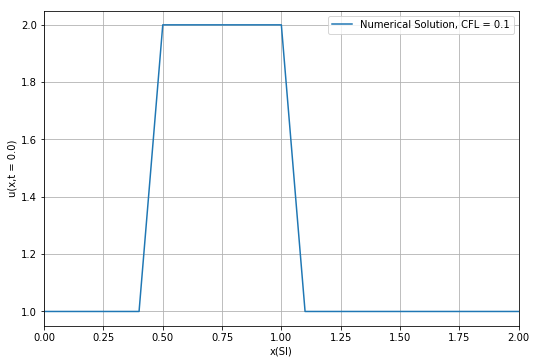

In [88]:
(tmax, xmax, nt, nx, c) = (0.5, 2.0, 51, 21, 1.0)
x, u = linear_convection(tmax, xmax, nt, nx, c)
Plotter(x, u, tmax, xmax, nx, nt, c, iteration = 0)

## Comments
- As we can see, the initial conditions are not a perfect square wave as the number of spatial points is minimal in the scheme !

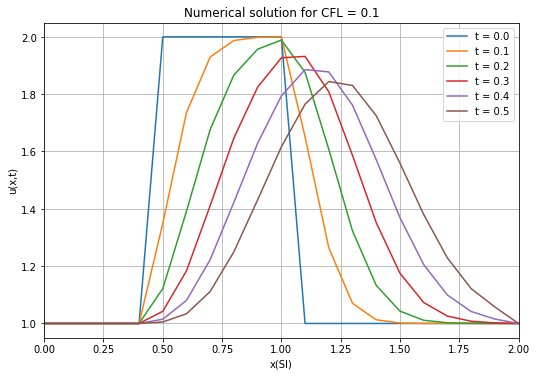

In [89]:
Plotter_2(x, u, tmax, xmax, nx, nt, c)

## Comments
- The solution is indeed convected to the right as expected but it is also strongly diffused ! $\Rightarrow$ The Backward differencing in space creates false diffusion.

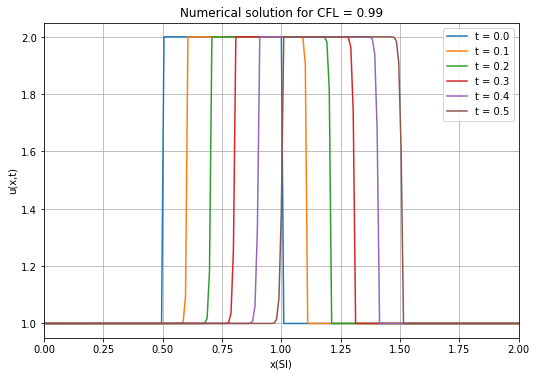

In [90]:
(tmax, xmax, nt, nx, c) = (0.5, 2.0, 51, 199, 1.0)
x, u = linear_convection(tmax, xmax, nt, nx, c)
Plotter_2(x, u, tmax, xmax, nx, nt, c)

## Comments
- When the spatial step is reduced (Number of grid points increased), the error reduces !

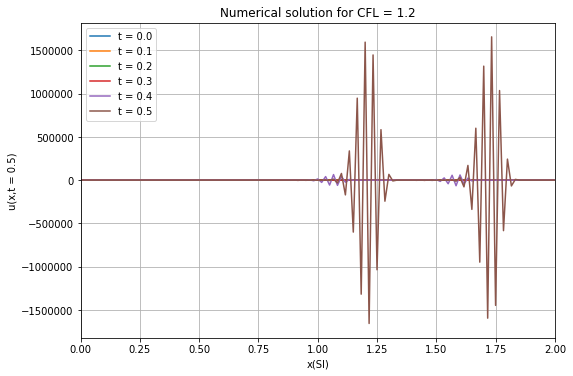

In [83]:
(tmax, xmax, nt, nx, c) = (0.5, 2.0, 51, 121, 2.0)
x, u = linear_convection(tmax, xmax, nt, nx, c)
Plotter_2(x, u, tmax, xmax, nx, nt, c)

## Comments
- When the CFL number becomes greater than unity, the scheme is unstable !

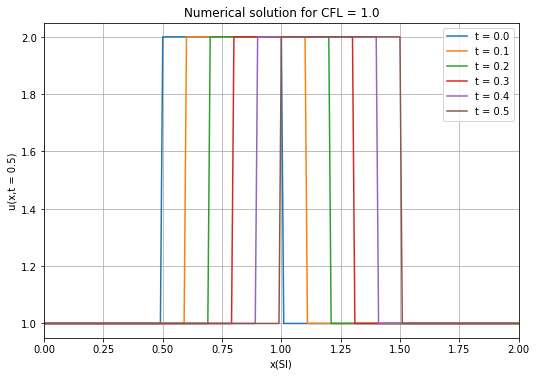

In [85]:
(tmax, xmax, nt, nx, c) = (0.5, 2.0, 51, 201, 1.0)
x, u = linear_convection(tmax, xmax, nt, nx, c)
Plotter_2(x, u, tmax, xmax, nx, nt, c)

## Comments
- A perfect solution is obtained when the CFL number is unity, that is when the distance travelled by the solution between two instants of time is exactly equal to the distance between two consecutive meshpoints:
\begin{equation}
c \Delta t = \Delta x
\end{equation}

- Si $\:x_{max} = ct_{max}$, alors $\:n_t = n_x$. Pour $c = 4.0$, $n_t = n_x$ $\forall$ la valeur de l'un des deux.

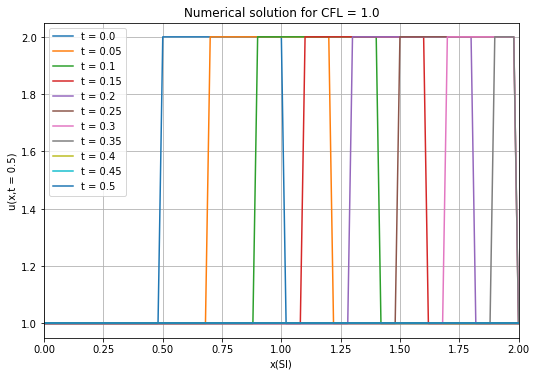

In [99]:
(tmax, xmax, nt, nx, c) = (0.5, 2.0, 101, 101, 4.0)
x, u = linear_convection(tmax, xmax, nt, nx, c)
Plotter_2(x, u, tmax, xmax, nx, nt, c)

## Comments
- There is a non-physical change of the profile near the wall and that is due to the absence of viscosity in the equation of convection !

## Comparaison with the analytical solution
- On va construire un 'Plotter_3' dans lequel on compare la solution analytique a celle numerique apres la definition de la solution analytique

In [71]:
def analytical_convection(tmax, xmax, nt, nx, c):
    
    import numpy as np 
    x = np.linspace(0.0, xmax, nx)
    t = np.linspace(0.0, tmax, nt)
    u = np.ones((nt, nx))
    
    for iteration in range(nt-1):
        for i in range(nx):
            if 0.5 <= x[i] - c*t[iteration] <= 1.0:
                u[iteration, i] = 2.0
    
    return x, u

In [74]:
def Plotter_3(x, u, u_analytical, tmax, xmax, nx, nt, c, iteration = 0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    
    CFL = c*dt/dx 
    CFL = float(round(CFL, 3))
    
    t = iteration*dt
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], linewidth = "2.5", label = "Numerical Solution a t = {:}".format(t))
    ax.plot(x, u_analytical[iteration, :], linestyle = "dotted", linewidth = "2.5", label = "Analytical Solution a t = {:}".format(t))

    
    ax.set_title("CFL = {:}".format(CFL))
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

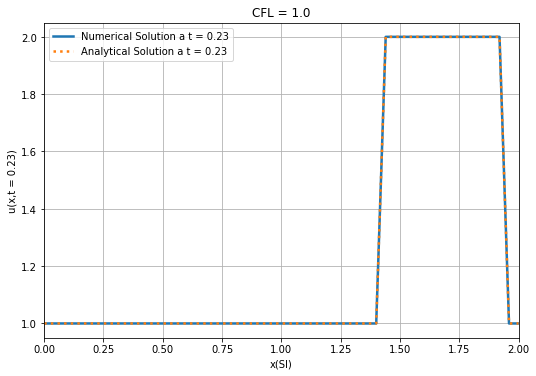

In [86]:
(tmax, xmax, nt, nx, c, iteration) = (0.5, 2.0, 51, 51, 4.0, 0)
x, u = linear_convection(tmax, xmax, nt, nx, c)
x, u_analytical = analytical_convection(tmax, xmax, nt, nx, c)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, nt, c, iteration = 23)

## Commentaires: 
- The spatial profile of the solution is correctly convected to the right as it should happen with very negligible error ! We conclude that a good choice of the grid parameters lead to a good agreement between the analytical and numerical solution !